# Analysis Report: U.S. Economic Landscape and Investment Outlook with Exploratory Data Analysis in R

Sept 11th 2025


### Overview:
The United States of America is the world’s largest economic powerhouse and holds the authority to change the global economic scene in an instant. For investors, many are not certain about the state that America is in, and whether or not it is an opportune moment to invest. Of which, concerns over three key issues: the impact of U.S. tariffs, risks associated with high national debt, and the potential for the dollar to be replaced by other currencies are to be discussed. This report strives to bring analysis based on factual data in R and ongoing policies to give investors insights into the American market. The report argues that despite current uncertainties, the United States remains a compelling market for investment, offering opportunities in hedging market volatility, capitalizing on policy-supported emerging industries, and leveraging trends in domestic industry reshoring.



We first begin setup by importing our libraries.

In [3]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(scales) # For better formatting
library(purrr) # Vector work
library(tidyquant)
library(tseries)
library(rugarch)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.3.0
v purrr     1.0.4     v tidyr     1.3.1
v readr     2.1.5     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching core tidyquant packages ---------

#### Overview: The Current Stock Market

To get an understanding of the current stock market, let us monitor its trends for the past few years. 
We can first monitor the moving average of the S&P 500 and notice that during Trump's presidency, the stock index has steadily climbed (as of Sept 1 2025). After a so-called "liberation day", the market plunged but soon recovered. 

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"Removed 248 rows containing missing values or values outside the scale range
(`geom_line()`)."


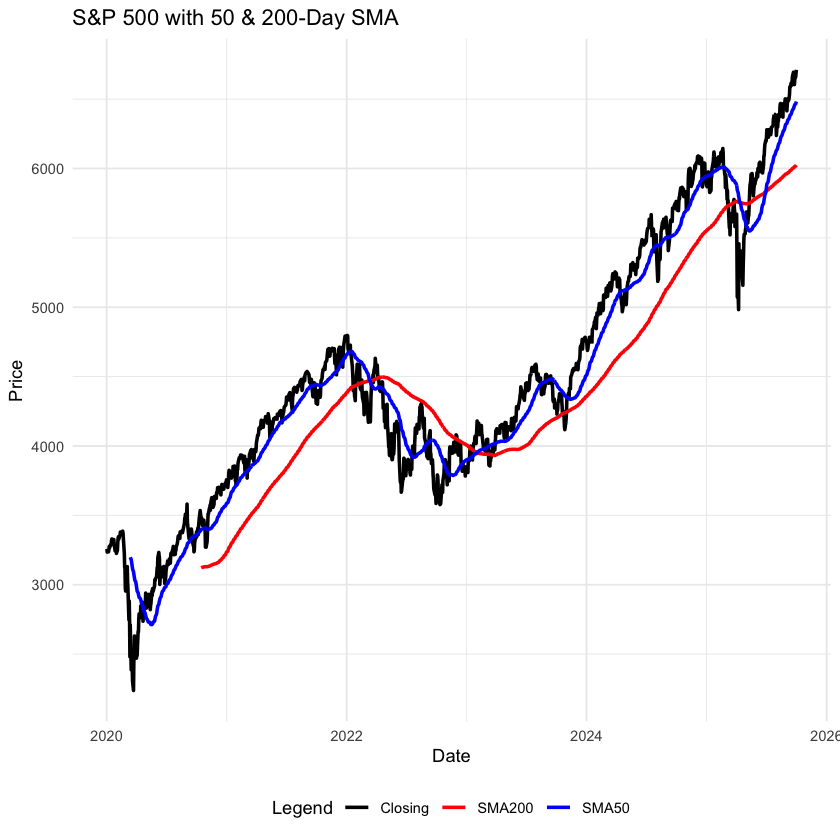

In [4]:

GSPC <- getSymbols("^GSPC", src = "yahoo", from = "2020-01-01", to = Sys.Date(), auto.assign = FALSE)

# Calculate moving averages
sma50 <- SMA(Cl(GSPC), n = 50)
sma200 <- SMA(Cl(GSPC), n = 200)

# data frame for ggplot
df <- data.frame(
  Date = index(GSPC),
  Closing = as.numeric(Cl(GSPC)),
  SMA50 = as.numeric(sma50),
  SMA200 = as.numeric(sma200)
)

# Convert to long format for ggplot
df_long <- df %>%
  pivot_longer(cols = c("Closing", "SMA50", "SMA200"),
               names_to = "Type",
               values_to = "Price")

# Plot using ggplot
ggplot(df_long, aes(x = Date, y = Price, color = Type)) +
  geom_line(size = 1) +
  scale_color_manual(values = c("Closing" = "black", "SMA50" = "blue", "SMA200" = "red")) +
  labs(title = "S&P 500 with 50 & 200-Day SMA",
       x = "Date",
       y = "Price",
       color = "Legend") +
  theme_minimal() +
  theme(legend.position = "bottom")

Taking a look at a simple moving average from 2020/01/01 to 2025/09/11, in the short term, there are risks of volatility as the trends are not completely stable nearing 2025. We observe that in the 200-day MA the price stays consistently above the MA, signalling a healthy and long-term hold. 

In the short term, however, things seem more susceptible to volatility. Policy uncertainty under the Trump administration will continue to drive market volatility. In addition, the U.S. stock market has repeatedly hit new highs since June-August, leading investors to grow increasingly cautious about mounting correction risks.


We shall do some simple analysis using a simplified GARCH model to show the volatility in the next few days:

The GARCH(1,1) model suggests that the volatility today is affected by the value yesterday and the volatility yesterday, given the time-series data and the:

$$\text{mean equation: } r_t = \mu + a_t,$$
$$\text{noise equation: } a_t = \varepsilon_t \sigma_t, \hspace{0.1cm}\varepsilon_t \sim N(0,1)$$
$$\text{variance equation: }\sigma_t^2 = \omega + \alpha a_{t-1}+\beta\sigma_{t-1}^2$$

$$\text{Where, }  a_{t-1} \text{ is the impact of yesterday's price and } \sigma_{t-1}^2 \text{ is the impact of yesterday's volatility } $$

$$\omega, \alpha, \beta \in  \mathbb{R}$$

In [16]:
# Fitting model 
getSymbols("^GSPC", src = "yahoo", from = "2020-01-01", to = "2025-09-21")
sp500 <- Cl(GSPC) # getting the closing prices
returns <- diff(log(sp500))[-1] # log returns for better statistical properties

spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,0)), 
  distribution.model = "norm"
)

fit <- ugarchfit(spec = spec, data = returns)
# show(fit)

[1] "GSPC"

      2025-09-19
T+1  0.006248062
T+2  0.006534315
T+3  0.006800264
T+4  0.007048454
T+5  0.007280932
T+6  0.007499376
T+7  0.007705186
T+8  0.007899543
T+9  0.008083456
T+10 0.008257798


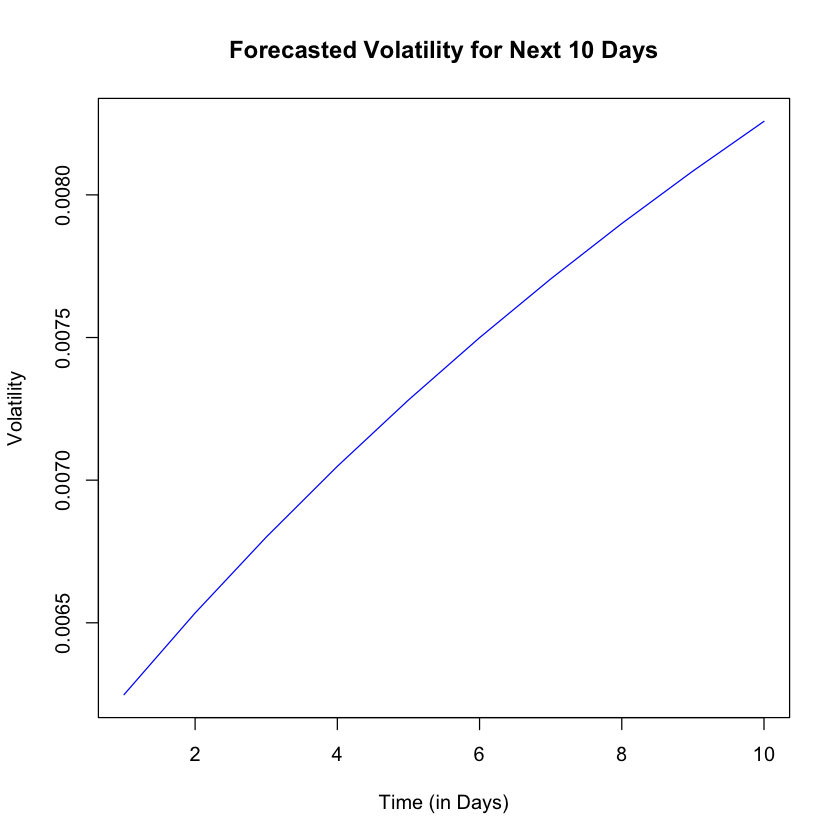

In [17]:
# Make predictions for the next 10 days
forecast_vol <- ugarchforecast(fit, n.ahead = 10)
sigma_forecast <- sigma(forecast_vol)
print(sigma_forecast)

plot(sigma_forecast, type = "l", 
    main = "Forecasted Volatility for Next 10 Days", 
    xlab = "Time (in Days)", 
    ylab = "Volatility", 
    col = "blue")


Effectively, the model shows us that for the next 10 days, the forecasted volatility of the prices will increase day by day. 
Meaning, for $68$% of daily returns are expected to fall within the $\pm 0.65$% of the mean return. We know that this would near  $68$% as we assumed that: $\epsilon_t \sim N(0,1) \\$ as it lies one $\sigma$ away. (As of Sep.11, 2025)

### Section 1.1: Manufacturing

In 2000, the global share of manufacturing output was the United States at 26.5%, Japan at 18.1%, Germany at 7.0%, and China at 6.9%. In 2024, the four countries still hold around 60% of the world’s manufacturing outputs, with the shares being: China increased to 31.6%, United States down to 15.9%, Japan at 6.5% and Germany at 4.8%. 

China's industrial expansion over this period was largely fueled by absorbing shares from the other three industrial powers (U.S., Japan, Germany). Simultaneously, China continuously upgraded its industrial structure and exported labor-intensive, low-to-mid-tier production to other regions (e.g., Southeast Asia).



### Section 1.2: Trade Deficit
Prior to the 2017 U.S.-China trade war, half of the deficit originated from China. By 2024, China’s share had declined to 25%, meaning that 75% of the shares are distributed by the rest of the world. This is a part of the reason why the Trump administration imposed tariffs on every country in the world and not exclusively on China. 

There are two perspectives on the trade deficit that the U.S. is enduring. Positively, this deficit corresponds to sustained global demand for dollar-denominated assets like Treasury bonds, granting the U.S. Treasury greater flexibility in debt issuance and the Federal Reserve more room to manage interest rate policy. However, high interest rates have sharply increased debt servicing costs, while potential constraints on Treasury issuance could undermine long-term confidence in the dollar.

In [7]:
trade_df <- read.csv("datasets/BOPGSTB.csv")
trade_df$observation_date <- as.Date(trade_df$observation_date)
filter_trade <- filter(trade_df, observation_date >= "2010-01-01" )
filter_trade$BOPGSTB <- filter_trade$BOPGSTB / 1000 # Converted to billions
tail(filter_trade)


,observation_date,BOPGSTB
,<date>,<dbl>
182,2025-02-01,-120.278
183,2025-03-01,-136.419
184,2025-04-01,-60.191
185,2025-05-01,-71.116
186,2025-06-01,-59.086
187,2025-07-01,-78.311


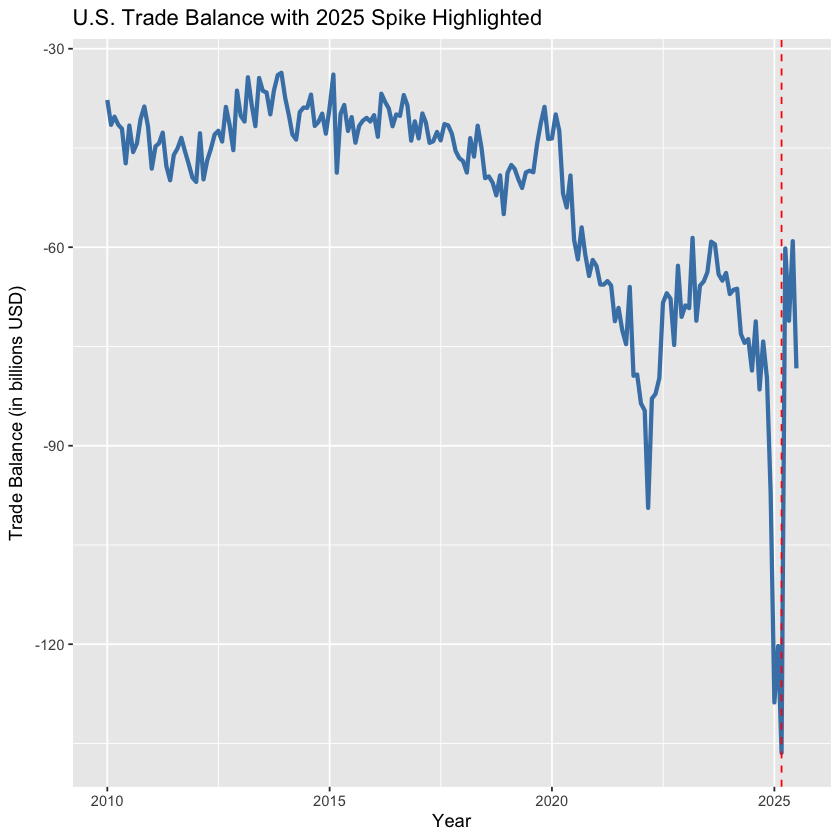

In [8]:
spike_date <- filter_trade$observation_date[which.min(filter_trade$BOPGSTB)]

plot <- filter_trade |>
  ggplot(aes(x = observation_date, y = BOPGSTB)) +
  geom_line(linewidth = 1.2, color = "steelblue") +
  geom_vline(xintercept = spike_date, 
             color = "red", 
             linetype = "dashed", 
             linewidth = 0.5) +
  labs(title = "U.S. Trade Balance with 2025 Spike Highlighted",
       x = "Year",
       y = "Trade Balance (in billions USD)") 

print(plot)

In [9]:
lowest_point <- filter_trade[which.min(filter_trade$BOPGSTB), ]
print(lowest_point)


    observation_date  BOPGSTB
183       2025-03-01 -136.419


We can see from the graph shown above that the U.S. was at an all time high for deficits in early 2025. Well exceeding 130 billion US dollars. This is likely caused by the increase in imports of goods and materials due to tariffs. However, we shall observe that the sharp decline in the deficit has reverted. This, is due to a dramatic drop in consumer goods imports, especially the trade gap with China. The trade gap with China has shrank to its lowest in 21 years according to CNBC reports. 

### Section 1.4: Share of Global GDP

In 2000, the United States accounted for 30.3% of global GDP, followed by the EU and UK at 26.2%, Japan at 14.6%, and China at 3.5%. By 2024, these shares had shifted significantly: the U.S. represented 26.3%, the EU and UK 20.5%, China 16.9%, and Japan 3.8%.
Japan’s nominal GDP reached its closest point to the U.S. in 1995, when it was approximately 73% of the U.S. economy. Similarly, China’s GDP peaked relative to the U.S. in 2021, reaching about 75% of the U.S. size. However, by 2024, China’s nominal GDP had declined to roughly 65% of the U.S. level, due to an 11-12% depreciation of the Chinese yuan against the U.S. dollar since 2021.
	While the United States wishes to weaken the U.S. dollar to boost export competitiveness, it must avoid excessive depreciation that could undermine the currency’s global utility or severely erode its purchasing power. Moreover, there is a strategic concern that an overly depreciated dollar could accelerate China’s economy, potentially overtaking the U.S. on the global stage.


### Section 1.5: Money Supply 

Since 2000, the U.S. M2 money supply grew approximately fourfold by early 2025, reaching $21.7 trillion. While China’s M2 money supply was 13.6 trillion yuan in 2000 and expanded nearly twentyfold by the end of 2024, reaching 307 trillion yuan (equivalent to roughly 53.5 trillion USD) . However, no direct comparison can be made as differences in how M2 is defined and in the structure of their financial systems mean these figures are not directly comparable. The U.S. is primarily direct finance-based, meaning a significant portion of assets resides in securities markets rather than bank deposits, thus not fully captured in M2. In contrast, China’s currency is backed by substantial foreign exchange reserves and gold, and its financial system remains bank-dominated and indirect finance-oriented. 


In [10]:
chinaM2 <- read.csv("datasets/chinaM2.csv")
usM2 <- read.csv("datasets/usM2.csv")

usM2 <- usM2 |>
    rename(Dollars = MYAGM2USM052S, Date = observation_date)

chinaM2 <- chinaM2 |>
    rename(Dollars = MYAGM2CNM189N, Date = observation_date)

# Convert DATE columns to actual date format
usM2$Date <- as.Date(usM2$Date)
chinaM2$Date <- as.Date(chinaM2$Date)

usM2_filter <- filter(usM2, Date >= "1998-12-01")

head(usM2_filter)


,Date,Dollars
,<date>,<dbl>
1,1998-12-01,4.3734e+12
2,1999-01-01,4.3943e+12
3,1999-02-01,4.4209e+12
4,1999-03-01,4.4321e+12
5,1999-04-01,4.4598e+12
6,1999-05-01,4.4782e+12


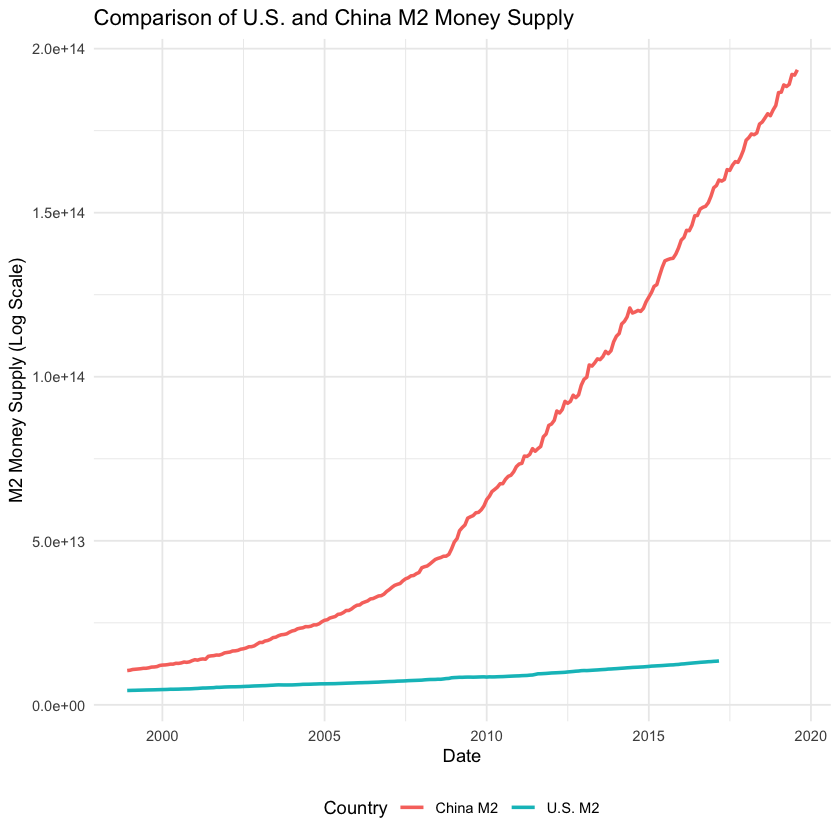

In [11]:

combined_plot <- ggplot() +
  geom_line(data = usM2_filter, aes(x = Date, y = Dollars, color = "U.S. M2"), linewidth = 1) +
  geom_line(data = chinaM2, aes(x = Date, y = Dollars, color = "China M2"), linewidth = 1) +
  labs(title = "Comparison of U.S. and China M2 Money Supply",
       x = "Date",
       y = "M2 Money Supply (Log Scale)",
       color = "Country") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(combined_plot)

## Section 2, Trump’s Policies and the Line of Logic
Throughout his campaign, Trump consistently reiterated his goals to create high-wage jobs for Americans while addressing the nation’s high debt burden. Many of Trump’s policies revolve around his plans for economic reform in America. 

The line of logic and main goals flows as follows:
Bring industries back to the U.S. for reindustrialization → Create jobs and reduce the trade deficit → Increase tax revenue, shrink the deficit, and reduce national debt. 

Following this underlying logic, many of his actions and headlines revolved around this core theme:

- Cracking down on illegal immigration to reduce labor supply competition and raise wages for Americans. 
- Imposing tariffs to force industry reshoring 
- Choosing the Middle East for his first official visit to ensure international energy prices and U.S. interests.
- Linking trade negotiations to domestic investment commitments
- Cutting bureaucratic waste and reducing public spending.

The Trump administration recognizes that the global economic system has developed a “path dependency” over the past three decades. By leveraging executive authority, the administration is pursuing a strategy of strategic rule-shifting to implement policies designed to recalibrate global economic architectures in favor of U.S. interests. 
This approach mirrors historic moments of the dissolution of the Bretton Woods system in the 1970s, wherein Washington redefined global rules without diminishing the dollar’s centrality, thus ensuring that structural reforms advance national objectives while maintaining international confidence in U.S. leadership.


### Section 2.1: Trump’s First and Current Presidential Term

The first Trump administration pursued an agenda defined by economic nationalism, unilateral policy actions, and deregulation, resulting in several significant outcomes. Trump redefined international relations by signing trade deals and opting out of agreements. 

As part of the USMCA trade agreement negotiated with Canada and Mexico, the Trump administration secured a key provision requiring that 75% of automotive manufacturing content originate within the U.S. This measure reinforced American leverage in regional trade, with both Canada and Mexico promptly agreeing to the terms. 

The Trump administration has pursued an unconventional agenda characterized by rapid execution as seen when the U.S. withdrew from the Trans-Pacific Partnership, the Paris Climate Agreement, and the Iran Nuclear Deal, while pressuring NATO allies to increase defense spending. Most notably, using tariffs as leverage, Trump forced China back to negotiations and secured the Phase One agreement. Overall, economic and market indicators showed significant upward momentum during this period in time. 


Summary Statistics of Economic Data (2017–2020):

Labor Market:
Unemployment fell from 4.7% in early 2017 to a 50-year low of 3.5% in February 2020.
Approximately 6.7 million nonfarm jobs were added.
Wage growth broke out of long-term stagnation, consistently reaching or exceeding 3% (compared to the previous ~2% trend).

GDP Growth:
Annual GDP growth remained steady: 2.3% (2017), 3.0% (2018), and 2.2% (2019), meeting Trump’s campaign growth targets.

Financial Markets:
The Dow Jones rose from ~20,000 to over 29,000 (pre-pandemic).
The S&P 500 gained nearly 50%, while the Nasdaq surged more than 75%.


This period in time for his first presidential term likely boosted his confidence in swiftly enacting policies in his second term . This is seen when Trump instituted a universal baseline tariff of at least 10% on all imported goods within a week of being in office. On “Liberation Day”, Trump established a reciprocal tariff mechanism that mirrors other nations' import duties on American products. This approach effectively disregards fundamental disparities in economic scale and development levels, creating an artificially leveled playing field that particularly disadvantages smaller economies despite the United States' dominant position in global production and consumption networks. This policy represents a fundamental reorientation of America's global trade relationships, extending beyond bilateral relations with major partners such as China and Canada to redefine engagement with all trading nations.

Concurrently, the administration has enacted a targeted "economic iron curtain" policy toward China, imposing punitive tariffs of 60% or higher on all Chinese imports while initiating procedures to revoke China's Permanent Normal Trade Relations status. This is complemented by a comprehensive supply chain reshoring initiative that combines tariff incentives, diplomatic pressure, and regulatory restrictions. With addition to prohibitions on government contracts tied to Chinese operations and limitations on sensitive technology investments to compel corporate relocation despite higher operational costs and potential efficiency reductions.

These policies collectively represent a strategic departure from multilateral trade principles, particularly through the systematic undermining of the Most-Favored-Nation clause that has underpinned the global trading system since World War II. The administration's approach prioritizes American economic superiority and strategic competition over reciprocal engagement, accelerating the fragmentation of global trade into competing blocs while potentially constraining economic growth in both partner and adversary nations through increased trade barriers and supply chain disruptions.



### Section 2.2: The One Big Beautiful Bill Act 
    
The One Big Beautiful Bill Act introduces significant structural changes to the U.S. budget through a combination of spending reductions, targeted investments, and tax reforms. Social programs including Medicaid, food assistance, and state welfare subsidies face substantial cuts and stricter eligibility requirements. These measures are designed to reduce fiscal burdens and improve the domestic tax environment to attract investment. To offset partial costs, new revenue streams are introduced, such as a higher investment tax on private universities and a 1% levy on overseas remittances, alongside expected tariff income. 

According to the U.S. Tax Foundation, the plan is projected to stimulate job creation and economic growth, adding nearly 1 million jobs and increasing annual GDP by approximately 0.8% over the next decade. However, the Congressional Budget Office estimates that these measures will also expand the federal deficit by nearly $3 trillion and potentially increase national debt by $3–4 trillion during the same period.

However, it is difficult to truly quantify and estimate the amount of deficit the Big Beautiful Bill Act will incur, since projections rely on statistical and economic models. While logically rigorous, these predictive frameworks operate under the assumption that all other variables remain unchanged, meaning the projections for GDP growth and fiscal deficits hold validity only if the U.S. development trajectory remains consistent. However, this assumption is increasingly untenable under the current administration. The incumbent administration frequently alters policy rules, and information that introduces significant unpredictability, creating substantial margin for error in decade-long forecasts.


### Section 2.3: Lower Corporate Tax Rates to Attract Investors 
As part of a broader strategy to enhance U.S. economic competitiveness, the current administration has prioritized regulatory reforms, including a significant reduction in the corporate tax rate. The statutory rate currently stands at 21% with President Trump having further indicated support for lowering the rate to 15% for industries and manufacturing operations based within the United States.
The objective of this proposed tax policy is to attract and retain business investment, strengthen domestic supply chains, and position the United States as one of the most attractive jurisdictions for corporate operations globally. This initiative reflects the administration’s commitment to using fiscal policy as a tool for industrial reactivation and long-term economic realignment, even as debates continue concerning the trade-offs between tax incentives, federal revenue, and fiscal sustainability.


### Section 2.4: Federal Workforce Reduction:
As part of its broader deregulatory agenda, the administration has reduced the federal workforce by approximately 300,000 employees across multiple agencies. This streamlining effort is strategically aligned with policies aimed at reducing regulatory barriers to stimulate investment in the United States. The reduction in personnel has been coupled with the restructuring or elimination of specific regulatory bodies, resulting in:
Deregulation in financial sectors such as hedge funds and private equity, and permission for retirement accounts to invest in alternative assets.
Streamlined approval processes for AI infrastructure projects and loosened restrictions on AI development and deployment.
A more favorable market environment for cryptocurrencies.
Relaxed policies for traditional energy production and eased environmental regulations.
Simplified export rules for military equipment.


### Section 2.5: The Federal Debt Problem
The Trump administration's economic strategy leverages a combination of tariff policies, regulatory reforms, and tax restructuring to address federal debt sustainability. A key component of this strategy involves revising tax policies to lower overall tax rates while broadening the tax base. By increasing the number of taxpayers rather than raising individual tax burdens, the administration aims to generate additional government revenue to decrease the overall federal debt.

Historically, U.S. federal debt has been treated as a zero-risk investment, under the assumption that the United States will not default. The issuance of this debt traditionally exhibited an inverse relationship with the federal funds rate: borrowing expanded during low-rate periods to lock in affordable financing and contracted during high-rate periods to avoid excessive costs. The current environment, however, marks a sharp departure from this pattern. Despite the federal funds rate remaining elevated near 4%, debt issuance continues to accelerate rapidly, driven by persistent structural deficits.


### Section 2.6: When is the Federal Debt a Problem?
The sustainability of U.S. federal debt is evaluated through three aspects: domestically held debt, debt burden relative to economic capacity, and interest rates. Domestically held debt, approximately 75% of total U.S. Treasuries, reduces external vulnerability and reinforces stability through aligned domestic incentives. The debt-to-GDP ratio, standing at approximately 100-110% when excluding Federal Reserve holdings, remains within manageable bounds compared to critical thresholds (160-200%) identified by institutions such as the IMF and Penn Wharton Budget Model. Lastly, the monetary policy environment, particularly the level of interest rates, directly impacts debt servicing costs and refinancing risks. Current elevated rates present fiscal challenges, though the Federal Reserve’s capacity to lower rates remains key in preserving medium-term debt sustainability.

Driven by emerging economic risks, the Trump administration has intensified its calls for the Federal Reserve to cut interest rates. This push is grounded in several key factors: interest payments on the national debt now consume 14% of the federal budget, exceeding the defense spending of 13%. Inflation has significantly cooled to 2.7% in July 2025 from its 9.1% peak three years earlier, at the same time, the unemployment rate has begun trending upward, reaching 4.2% in July. 

Despite the recent fear of the federal debt, U.S. Treasury securities continue to be perceived as low-risk assets by global investors. The U.S. dollar's role as the world's dominant reserve currency, facilitating over 80% of foreign exchange transactions, nearly half of global trade settlements, and comprising approximately 60% of central bank reserves. This creates inherent demand for dollar-denominated assets. This is further reinforced by the liquidity of the Treasury market, where daily trading volumes exceed $1 trillion, providing investors with unmatched flexibility. 


## Section 3: The American Investment Landscape
	
Since the Trump administration took office, the global economic landscape has been marked by heightened uncertainty, market volatility, and increased political influence over economic affairs. This environment has led many investors to reconsider investment activities in the United States. The following analysis delves deeper into the implications of these developments for the U.S. market and identifies the core ideas of the current policies.

### Section 3.1: Redefining the Rules for the 401(k)

The Trump administration on August 7th, 2025, announced to democratize access to alternative assets for all 401(k) investors. The policy change would allow Americans more diversified investment options and attain stronger and more financially secure retirement outcomes through options such as real estate, cryptocurrencies, and private equity. Details for the plan are available starting early 2026. From the directions of these policies, we believe that the market's new capital flowing into alternative assets could range from $600 billion to $1.2 trillion.

### Section 3.2: Hedge Funds in Relations of Downside Risk.
Hedge Funds Targeting Absolute Returns (α): Unlike mutual funds, which primarily seek relative returns (β) (aiming to outperform the market in bull conditions and minimize losses during bear markets), hedge funds employ α-driven strategies designed to generate positive returns regardless of market conditions. This approach is particularly effective in environments heightened uncertainty and elevated correction risks, enabling them to deliver excess returns. This approach also allows the volatility to be lower when compared to traditional stocks and bonds. 
An analysis of the worst 10 months for equities and bonds over the 10-year period ending December 2024 reveals the HF Composite's role as an effective diversifier and risk mitigator. Hedge funds generate alpha even during periods of bond market stress. The most pronounced example occurred in the year of 2022, where the HF Composite's drawdown was limited to -2.4%, significantly cushioning portfolios against the equity market's -20% decline.

### Section 3.3: A Summary, Finding Certainty in the World of Uncertainty
In a world of uncertainty, we identify the following core certainties shaping the U.S. economic landscape:

Policy uncertainty under the Trump administration will continue to drive market volatility. In addition, the U.S. stock market has repeatedly hit new highs since June-August, leading investors to grow increasingly cautious about mounting correction risks.
U.S. policies will continue to support AI and cryptocurrencies to focus on maintaining the U.S. dollar hegemony. Recent domestic regulatory relaxation continues to solidify American leadership in emerging technologies and assets. Creating a more favorable environment for AI infrastructure investments, cryptocurrency issuers, and trading platforms.
Industrial reshoring and rising domestic investment. U.S. tariffs are explicitly tied to commitments for domestic investment, making it clear that corporate reshoring will drive new demand for residential and industrial real estate.
